In [26]:
from load import load_assets_info, load_events_info
from download import download_asset_info, download_event_info
from datetime import date, timedelta, datetime
import os
import pandas as pd
import cv2
import time
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import date, timedelta, datetime
import requests


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Define collections

In [20]:
animeta = {'asset_name':'animeta','contract':"0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5",'start_date':date(2021, 7, 30)}
BAYC = {'asset_name':'BAYC','contract':"0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D",'start_date':date(2021, 5, 24)}
meebit = {'asset_name':'meebit','contract':"0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7",'start_date':date(2021, 5, 3)}
hashmask = {'asset_name':'hashmask','contract':"0xC2C747E0F7004F9E8817Db2ca4997657a7746928",'start_date':date(2021, 1, 30)}
penguin = {'asset_name':'penguin','contract':"0xBd3531dA5CF5857e7CfAA92426877b022e612cf8",'start_date':date(2021, 7, 23)}
veefriend = {'asset_name':'veefriend','contract':"0xa3AEe8BcE55BEeA1951EF834b99f3Ac60d1ABeeB",'start_date':date(2021, 5, 17)}
coolcat = {'asset_name':'coolcat','contract':"0x1A92f7381B9F03921564a437210bB9396471050C",'start_date':date(2021, 7, 1)}
cranium = {'asset_name':'cranium','contract':"0x85f740958906b317de6ed79663012859067E745B",'start_date':date(2021, 6, 17)}
MAYC = {'asset_name':'MAYC','contract':"0x60E4d786628Fea6478F785A6d7e704777c86a7c6",'start_date':date(2021, 8, 27)}
bloot = {'asset_name':'bloot','contract':"0xFF9C1b15B16263C61d017ee9F65C50e4AE0113D7",'start_date':date(2021, 8, 25)}
on1 = {'asset_name':'on1','contract':"0x3bf2922f4520a8BA0c2eFC3D2a1539678DaD5e9D",'start_date':date(2021, 8, 15)}
punkscomic = {'asset_name':'comic','contract':"0x5ab21Ec0bfa0B29545230395e3Adaca7d552C948",'start_date':date(2021, 5, 11)}
worldwomen = {'asset_name':'women','contract':"0xe785E82358879F061BC3dcAC6f0444462D4b5330",'start_date':date(2021, 7, 27)}
koala = {'asset_name':'koala','contract':"0x3f5FB35468e9834A43dcA1C160c69EaAE78b6360",'start_date':date(2021, 8, 20)}

In [27]:
collections = [animeta, BAYC, meebit, hashmask, penguin, veefriend, coolcat, cranium, MAYC, bloot, on1, punkscomic,
               worldwomen, koala]

In [61]:
collection['assets'][0]

{'id': 38949569,
 'token_id': '29',
 'num_sales': 0,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/tupecV9G4o2d19UpX4oEHCencLhtpZiQ0gbdM2fqkbKCtt6-zTJrYsWX4_4n-CZOzjr0Keo_yyHhdr6w7oB-vsdwWbZnmVFYGSjkSA',
 'image_preview_url': 'https://lh3.googleusercontent.com/tupecV9G4o2d19UpX4oEHCencLhtpZiQ0gbdM2fqkbKCtt6-zTJrYsWX4_4n-CZOzjr0Keo_yyHhdr6w7oB-vsdwWbZnmVFYGSjkSA=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/tupecV9G4o2d19UpX4oEHCencLhtpZiQ0gbdM2fqkbKCtt6-zTJrYsWX4_4n-CZOzjr0Keo_yyHhdr6w7oB-vsdwWbZnmVFYGSjkSA=s128',
 'image_original_url': 'https://koala-intelligence-agency.s3.us-east-2.amazonaws.com/koalas/29.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'Koala Agent #29',
 'description': 'A total of 10,000 unique Koalas are fully trained and prepared to deploy. They are masters of disguise, sifting their way through the general public without a shred of evidence left behind.',
 'external_link': None,
 'asset_con

In [56]:
collection['sales'][28]

{'approved_account': None,
 'asset': None,
 'asset_bundle': {'maker': {'user': {'username': 'aizome'},
   'profile_img_url': 'https://storage.googleapis.com/opensea-static/opensea-profile/26.png',
   'address': '0xb503c8a636f268e10657dcff0e21fb6cddf804f7',
   'config': ''},
  'slug': 'kia-f-t-g23',
  'assets': [{'id': 39012189,
    'token_id': '525',
    'num_sales': 0,
    'background_color': None,
    'image_url': 'https://lh3.googleusercontent.com/9Qsuwxxwlbji1wSDJTio1t9CnAo8DlLFkp0GA9G8HwGqvcjRWI_gPpnRXU-tub1aHMeWjy89-jo-gbsr0eKQMLstq_oRb9XJPxeQuzw',
    'image_preview_url': 'https://lh3.googleusercontent.com/9Qsuwxxwlbji1wSDJTio1t9CnAo8DlLFkp0GA9G8HwGqvcjRWI_gPpnRXU-tub1aHMeWjy89-jo-gbsr0eKQMLstq_oRb9XJPxeQuzw=s250',
    'image_thumbnail_url': 'https://lh3.googleusercontent.com/9Qsuwxxwlbji1wSDJTio1t9CnAo8DlLFkp0GA9G8HwGqvcjRWI_gPpnRXU-tub1aHMeWjy89-jo-gbsr0eKQMLstq_oRb9XJPxeQuzw=s128',
    'image_original_url': 'https://koala-intelligence-agency.s3.us-east-2.amazonaws.com/koalas/

In [ ]:
df = pd.DataFrame(columns =['avg', 'num_sales', 'gains made by sale', 'dates of sales'])

In [59]:
def all_assets_sales_dict(collection):
    """
    Return dictionaries of token id's paired with all sales + a dataframe of stats
        avg price of all sales
        number of sales
        gains made by sale
        dates of sales
    """
    count = 0
    all_sales = {}
    all_avg_price = {}
    all_num_sales = {}
    df = pd.DataFrame(lst, index =collection['asset_list'],
                                              columns =['sale', 'num_sales', 'gains made by saledates of sales'])
    
    for sale in collection['sales']:
        sale_date = sale
        # if not a bundle
        if sale['asset']:
            # Check if the token_id exists in our dictionary, if not add it along with the sale
            if sale['asset']['token_id'] not in all_sales:
                all_sales[sale['asset']['token_id']] = [sale]
            # If it does exist, add the sale
            else:
                all_sales[sale['asset']['token_id']].append(sale)
        else:
            for asset in sale['assets']:
                # Check if the token_id exists in our dictionary, if not add it along with the sale
                if asset['token_id'] not in all_sales:
                    all_sales[asset['token_id']] = [sale]
                # If it does exist, add the sale
                else:
                    all_sales[asset['token_id']].append(sale)
        
        
    
    return all_sales

In [62]:
def import_data(save_location, collection, salesdfs, event_type):
    # If the path already exists then just load the already downloaded collection info 
    if os.path.isdir(save_location):
        # Load assets
        collection['assets'] = load_assets_info(save_location, asset_name=collection['asset_name'])
        # set created date of the collection to the start date
        collection['start_date'] = (datetime.fromisoformat(collection['assets'][0]['collection']['created_date'][:10])).date()
        # load events
        collection['sales'] = load_events_info(save_location+event_type+'\\')
    else:
        # Download assets
        download_asset_info(save_location, asset_name=collection['asset_name'], contract=collection['contract'], limit=1000, request_buffer=1)
        # Load assets
        collection['assets'] = load_assets_info(save_location, asset_name=collection['asset_name'])
        # set created date of the collection to the start date
        collection['start_date'] = (datetime.fromisoformat(collection['assets'][0]['collection']['created_date'][:10])).date()
        # set event type to download and download
        download_event_info(save_location+event_type+'\\', contract=collection['contract'], start_date=collection['start_date'],
                                                   end_date= (collection['start_date'] + timedelta(days=14)),
                                                   event_type=event_type, hour_chunks=24, request_buffer=.5)
        # load events
        collection['sales'] = load_events_info(save_location+event_type+'\\')

    # modify data as needed
    asset_list = []
    for asset in collection['assets']:
        asset_list.append(asset['token_id'])
    collection['asset_list'] = asset_list
    sales_dfs.append(pd.DataFrame.from_records(collection['sales']))
    sales_dfs[idx]['total_price'] = sales_dfs[idx]['total_price'].astype(float)*(10**-18)
    sales_dfs[idx]['created_date'] = pd.to_datetime(sales_dfs[idx]['created_date'])
    return sales_dfs, collection

In [41]:
sales_dfs = []
# set up plotly figure
# set up titles of each plot ahead of time
titles = []
# assign specs, e.g. adding secondary y axis
specs = []
# get names of collections
names = []
for collection in collections:
    titles.append("Timeline of floor " + collection['asset_name']+ " Price in ETH (green) + count of sales (red). Released "+
                  str(collection['start_date']))
    specs.append([{"secondary_y": True}])
    names.append(collection['asset_name'])
fig = make_subplots(len(collections),1, subplot_titles=titles, specs=specs)


# Define what type of events e.g. 'successful' (sales) or 'all'
event_type = 'successful'

# Download and Load data
for idx, collection in enumerate(collections):
    
    # SET save location
    save_location = str(os.getcwd())+ "\\static\\" + collection['asset_name'] + "\\";
    # Load or Downdload + Load collection data on assets and events
    # returns a dataframe of date of sales info and date + collection of all 
    sales_dfs, collection = import_data(save_location, collection, sales_dfs, event_type)

    # add first scatter trace
    data1 = sales_dfs[idx][['created_date', 'total_price']].resample('240min', on='created_date').min()['total_price']
    df1 = pd.DataFrame(list(zip(data1.index.strftime("%Y-%m-%d %H:%M:%S").tolist(),data1.values )), columns=['date','floor'])
    fig.add_trace(go.Bar(x=df1['date'], y=df1['floor'],
                         name=('A'),
                         marker_color = 'green',
                         opacity=0.4,
                         marker_line_color='rgb(0,50,100)',
                         marker_line_width=2,
                         error_y=dict(
                             type='percent', # value of error bar given as percentage of y value
                             value=10,
                             visible=True)),
                  row = idx+1, col = 1, secondary_y=False)
    

    # add first bar trace
    data2 = sales_dfs[idx][['created_date', 'total_price']].resample('240min', on='created_date').count()['total_price']
    df2 = pd.DataFrame(list(zip(data2.index,data2.values )), columns=['date','count'])
    fig.add_trace(go.Scatter(x=df1['date'], y=np.log10(df2['count']), line=dict(color='red'), name='B'),
                  row = idx+1, col = 1, secondary_y=True)
    
    # Update Y-Axes
    if max(df1['floor']) < 8:
        fig.update_yaxes(title_text="min sale price in 240 minute range", range=[0, max(df1['floor'])], row=idx+1, col=1, secondary_y=False)
    else:
        fig.update_yaxes(title_text="min sale price in 240 minute range", range=[0, 8], row=idx+1, col=1, secondary_y=False)
    fig.update_yaxes(title_text="log10 of sale count during 240 minute range", range=[0, 3], row=idx+1, col=1, secondary_y=True)
        
# Get string of all collection names
name_string = ""
for name in names:
    name_string = name_string + name + ' - '
    
# Update title and height
fig.update_layout(title_text="Collections: " + name_string, height=6000)
    
fig.show()

In [142]:
sales_dfs = []
#fig, ax = plt.subplots(len(collections)*2, figsize=(18,6));
# set up plotly figure
titles = []
specs = []
for collection in collections:
    titles.append("Timeline of sales count of " + collection['asset_name']+ " in (red) + sales volume in ETH(blue). Released " 
                      + str(collection['start_date']))
    specs.append([{"secondary_y": True}])
    
fig = make_subplots(len(collections),1, subplot_titles=titles, specs=specs)
event_type = 'successful'
# Download and Load data
for idx, collection in enumerate(collections):
    save_location = str(os.getcwd())+ "\\static\\" + collection['asset_name'] + "\\";
    # If the path already exists then just load the already downloaded collection info 
    if os.path.isdir(save_location):
        # Load assets
        collection['assets'] = load_assets_info(save_location, asset_name=collection['asset_name'])
        # set created date of the collection to the start date
        collection['start_date'] = (datetime.fromisoformat(collection['assets'][0]['collection']['created_date'][:10])).date()
        # load events
        collection['sales'] = load_events_info(save_location+event_type+'\\')
    else:
        # Download assets
        download_asset_info(save_location, asset_name=collection['asset_name'], contract=collection['contract'], limit=1000, request_buffer=1)
        # Load assets
        collection['assets'] = load_assets_info(save_location, asset_name=collection['asset_name'])
        # set created date of the collection to the start date
        collection['start_date'] = (datetime.fromisoformat(collection['assets'][0]['collection']['created_date'][:10])).date()
        # set event type to download and download
        download_event_info(save_location+event_type+'\\', contract=collection['contract'], start_date=collection['start_date'],
                                                   end_date= (collection['start_date'] + timedelta(days=14)),
                                                   event_type=event_type, hour_chunks=24, request_buffer=.5)
        # load events
        collection['sales'] = load_events_info(save_location+event_type+'\\')
    
    # modify data as needed
    sales_dfs.append(pd.DataFrame.from_records(collection['sales']))
    sales_dfs[idx]['total_price'] = sales_dfs[idx]['total_price'].astype(float)*(10**-18)
    sales_dfs[idx]['created_date'] = pd.to_datetime(sales_dfs[idx]['created_date'])
    


    # add first scatter trace
    data1 = sales_dfs[idx][['created_date', 'total_price']].resample('240min', on='created_date').sum()['total_price']
    df1 = pd.DataFrame(list(zip(data1.index.strftime("%Y-%m-%d %H:%M:%S").tolist(),data1.values )), columns=['date','volume'])
    fig.add_trace(go.Scatter(x=df1['date'], y=np.log10(df1['volume']), line=dict(color='blue'), name='B'),
                  row = idx+1, col = 1, secondary_y=False)
    print()

    # add first bar trace
    data2 = sales_dfs[idx][['created_date', 'total_price']].resample('240min', on='created_date').count()['total_price']
    df2 = pd.DataFrame(list(zip(data2.index,data2.values )), columns=['date','count'])
    fig.add_trace(go.Scatter(x=df1['date'], y=np.log10(df2['count']), line=dict(color='red'), name='B'),
                  row = idx+1, col = 1, secondary_y=True)
   
    fig.update_yaxes(title_text="log of ETH volume count during 240 minute range", range=[0, 3], row=idx+1, col=1, secondary_y=False)
    fig.update_yaxes(title_text="log of sale count during 240 minute range", range=[0, 3], row=idx+1, col=1, secondary_y=True)
        
    
    
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=6000)
    
fig.show()

### Downloading most recent collections 50,000 and visualizing floor of those with significant ETH volume

In [92]:
def timestamp_row(row):
    return row['transaction']['timestamp']

In [181]:
url = "https://api.opensea.io/api/v1/collections"
listocollects = []

for i in range(0, 167):
    querystring = {"offset":str(i*300),
                   "limit":300}
    response = requests.request("GET", url, params=querystring)
    print(i, end=" ")
    if response.status_code != 200:
        print('error')
        print(response.json())
        break

    # Getting collection data
    collects = response.json()
    # storing collections into list
    listocollects.append(collects)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 error
{'offset': ['ensure this value is less than or equal to 50000']}


In [194]:
listocollects[0]['collections']

[{'primary_asset_contracts': [],
  'traits': {},
  'stats': {'one_day_volume': 0.0,
   'one_day_change': 0.0,
   'one_day_sales': 0.0,
   'one_day_average_price': 0.0,
   'seven_day_volume': 0.0,
   'seven_day_change': 0.0,
   'seven_day_sales': 0.0,
   'seven_day_average_price': 0.0,
   'thirty_day_volume': 0.0,
   'thirty_day_change': 0.0,
   'thirty_day_sales': 0.0,
   'thirty_day_average_price': 0.0,
   'total_volume': 0.0,
   'total_sales': 0.0,
   'total_supply': 0.0,
   'count': 0.0,
   'num_owners': 0,
   'average_price': 0.0,
   'num_reports': 0,
   'market_cap': 0.0,
   'floor_price': 0.0},
  'banner_image_url': None,
  'chat_url': None,
  'created_date': '2021-09-06T02:14:57.410413',
  'default_to_fiat': False,
  'description': None,
  'dev_buyer_fee_basis_points': '0',
  'dev_seller_fee_basis_points': '0',
  'discord_url': None,
  'display_data': {'card_display_style': 'contain', 'images': []},
  'external_url': None,
  'featured': False,
  'featured_image_url': None,
  'hi

In [196]:
collections = []
for bunch in listocollects:
    collects = bunch['collections']
    for collect in collects:
        if collect['stats']['total_sales'] > 10:
            if collect['primary_asset_contracts'] != []:
                print(collect['name'], collect['created_date'], collect['stats']['total_sales'], collect['primary_asset_contracts'][0]['address'])
                collections.append({'asset_name':collect['name'],'contract':collect['primary_asset_contracts'][0]['address'],'start_date':collect['created_date']})

Loot (for Scammers) 2021-09-05T23:29:46.811011 87.0 0xb12f78434ae7d12ae548c51a5cb734ecc4536594
Blootavatars 2021-09-05T21:24:37.891581 14.0 0xce95fd8ba33dd1f394f17f5ad8100d4bc8daaa01
Stage Names For Rappers 2021-09-05T19:55:03.046501 81.0 0x591e2b8c3d2c32d10b62ed04ca20b88e9865fd6d
Trash Pandas of the World 2021-09-05T19:00:17.779288 30.0 0x3c624857c4d3fcd693fff925895bdfbe35cc978f
Guardians of the Metaverse 2021-09-05T17:46:10.497995 85.0 0x62cdaf466511888792c8c413239baa70f57f1654
Video Game Dev Squad 2021-09-05T16:39:09.151769 22.0 0x548c407d35cdd3c812458d9ef6d135963f9f7ece
Lucky Buddha Lucky Club 2021-09-05T16:26:28.168870 335.0 0x657f49b422f98b3092f27add6210831bf2e56622
Asia Metropolis 2021-09-05T16:00:21.940292 769.0 0xd208ee54fde79d6ab54be4cc844d22c40bde2ddc
Lobby Lobsters 2021-09-05T15:10:45.338588 810.0 0xc0cb81c1f89ab0873653f67eea42652f13cd8416
Gambling Apes Official 2021-09-05T13:50:53.810767 94.0 0x90ca8a3eb2574f937f514749ce619fdcca187d45
CryptoPochi 2021-09-05T11:00:31.880747

In [193]:
collections[0]

{'asset_name': 'Stage Names For Rappers',
 'contract': '0x591e2b8c3d2c32d10b62ed04ca20b88e9865fd6d',
 'start_date': datetime.date(2021, 9, 5),
 'assets': array([{'id': 46062256, 'token_id': '20', 'num_sales': 0, 'background_color': None, 'image_url': 'https://storage.opensea.io/files/88b335fa81143523c5a55020ad81fe8f.svg', 'image_preview_url': 'https://storage.opensea.io/files/88b335fa81143523c5a55020ad81fe8f.svg', 'image_thumbnail_url': 'https://storage.opensea.io/files/88b335fa81143523c5a55020ad81fe8f.svg', 'image_original_url': None, 'animation_url': None, 'animation_original_url': None, 'name': 'Stage Name #20', 'description': 'Stage Names are random onchain names inspired by the Wu-Tang Clan name generator. Feel free to use Stage Names in any way you want.', 'external_link': None, 'asset_contract': {'address': '0x591e2b8c3d2c32d10b62ed04ca20b88e9865fd6d', 'asset_contract_type': 'non-fungible', 'created_date': '2021-09-05T19:54:59.927844', 'name': 'Stage Names (For Rappers)', 'nft_v

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 7777 assets saved toC:\Users\ajduf\Documents\Dcent.Dev\data-mining

0successful2021-09-05 300 events saved toC:\Users\ajduf\Documents\Dcent.Dev\data-mining-nfts\static\Asia Metropolis\successful\assets_events_list_2021-09-05.npz
0successful2021-09-06 1successful2021-09-06 33 events saved toC:\Users\ajduf\Documents\Dcent.Dev\data-mining-nfts\static\Asia Metropolis\successful\assets_events_list_2021-09-06.npz
0successful2021-09-07 0successful2021-09-08 0successful2021-09-09 0successful2021-09-10 0successful2021-09-11 0successful2021-09-12 0successful2021-09-13 0successful2021-09-14 0successful2021-09-15 0successful2021-09-16 0successful2021-09-17 0successful2021-09-18 0successful2021-09-19 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 1

IndexError: index 0 is out of bounds for axis 0 with size 0

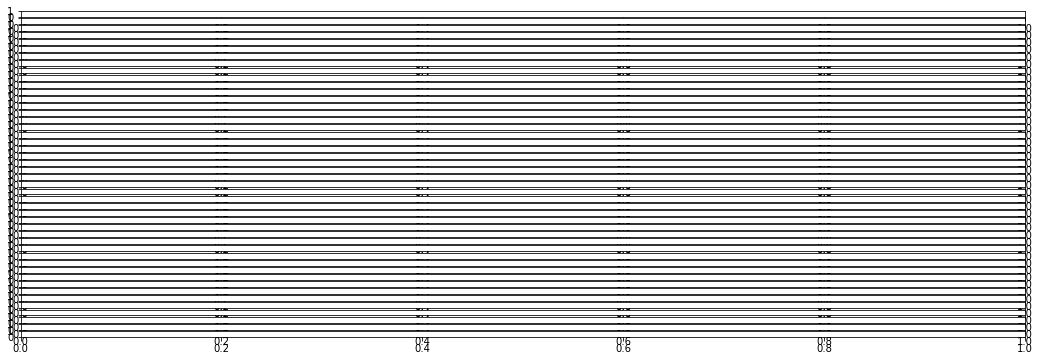

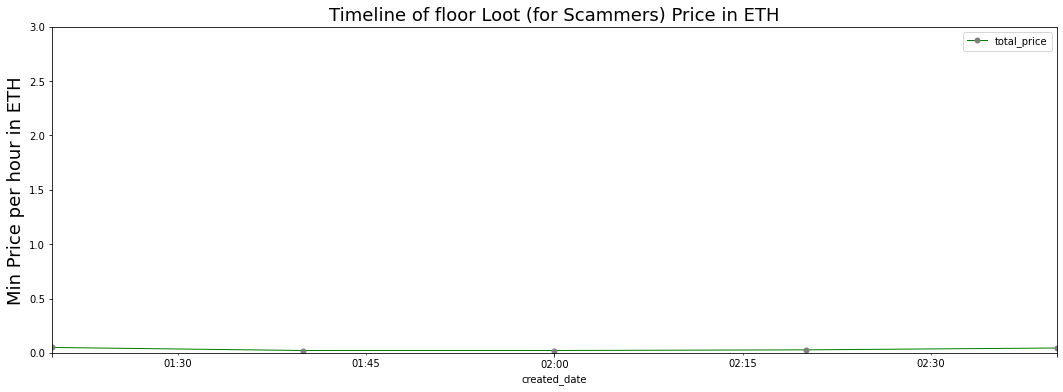

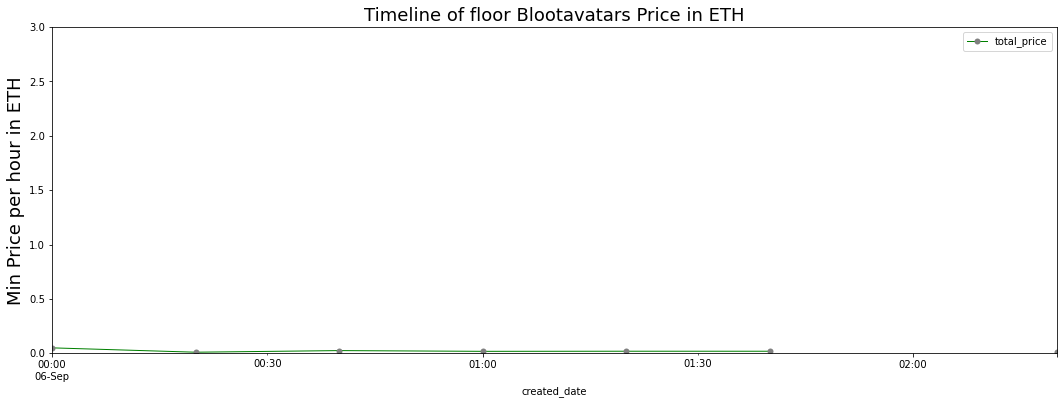

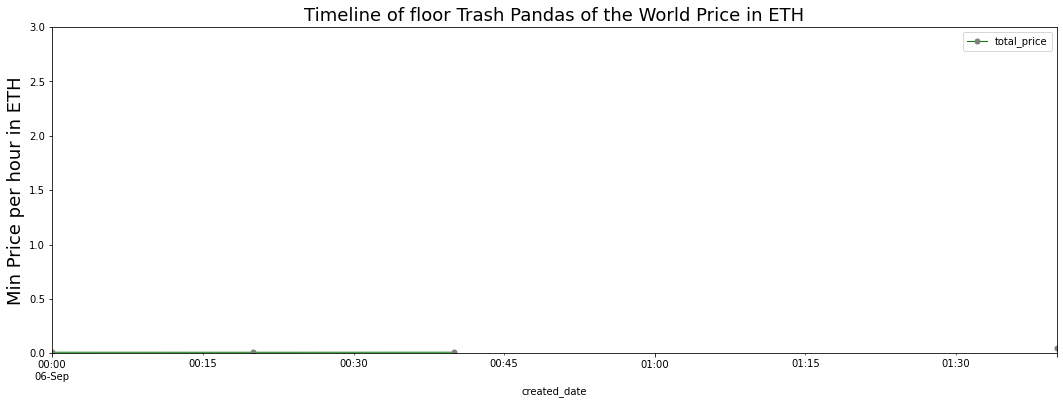

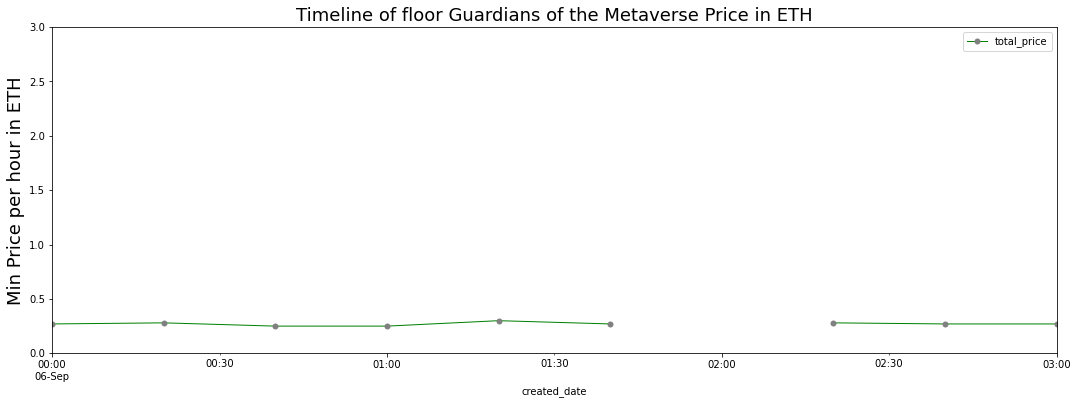

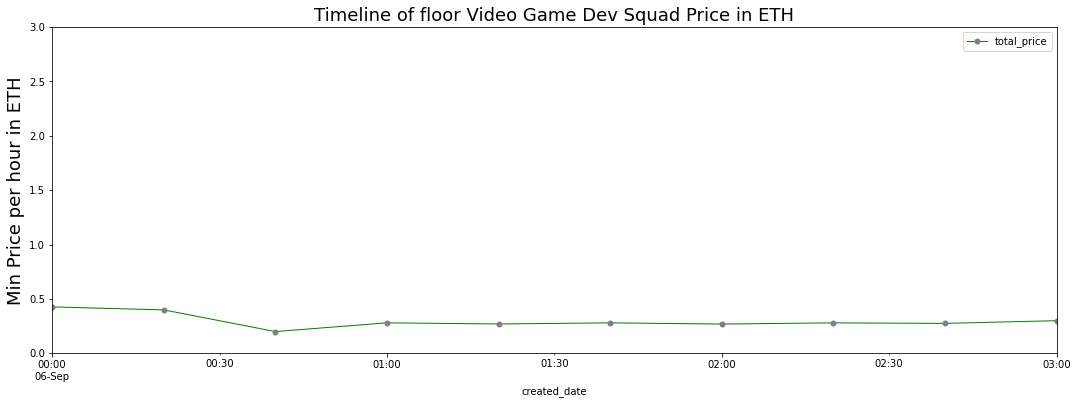

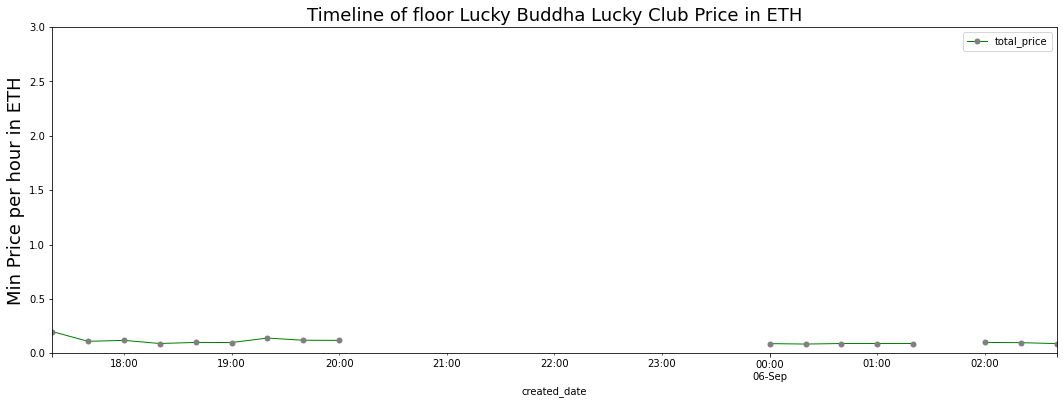

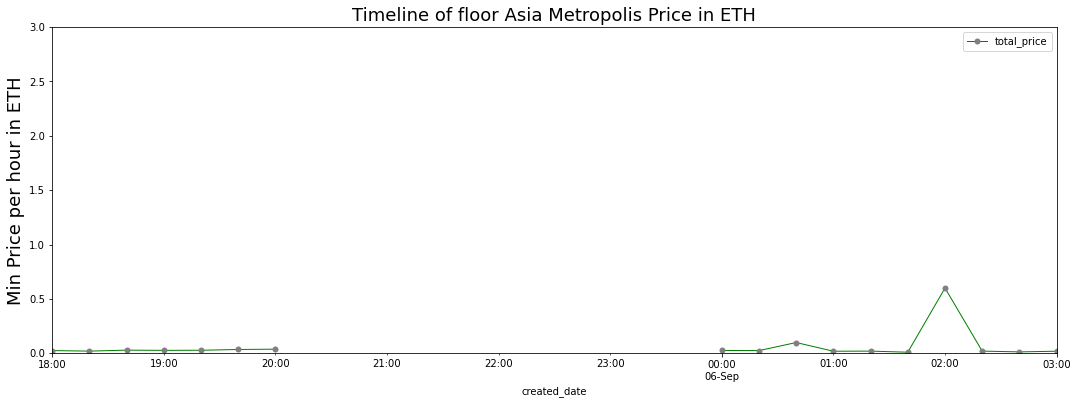

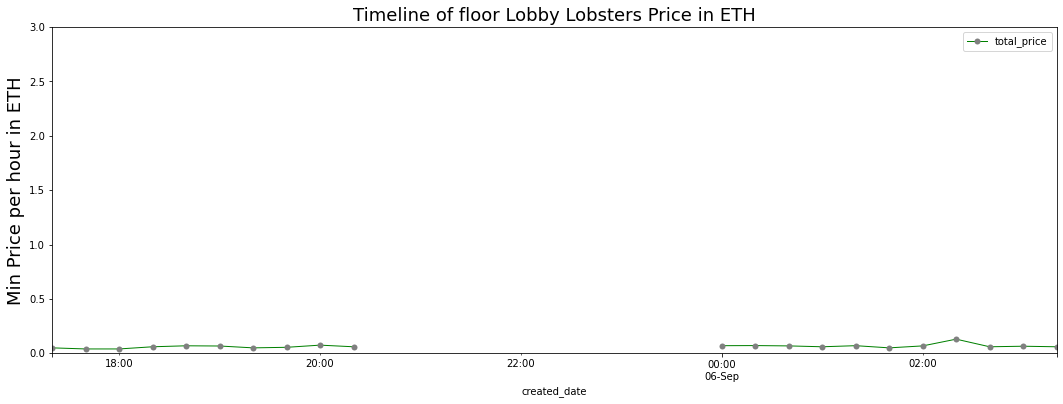

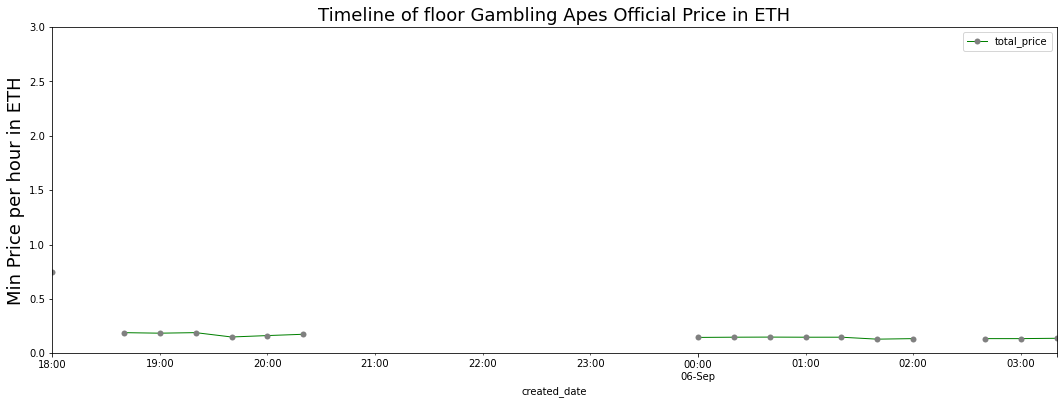

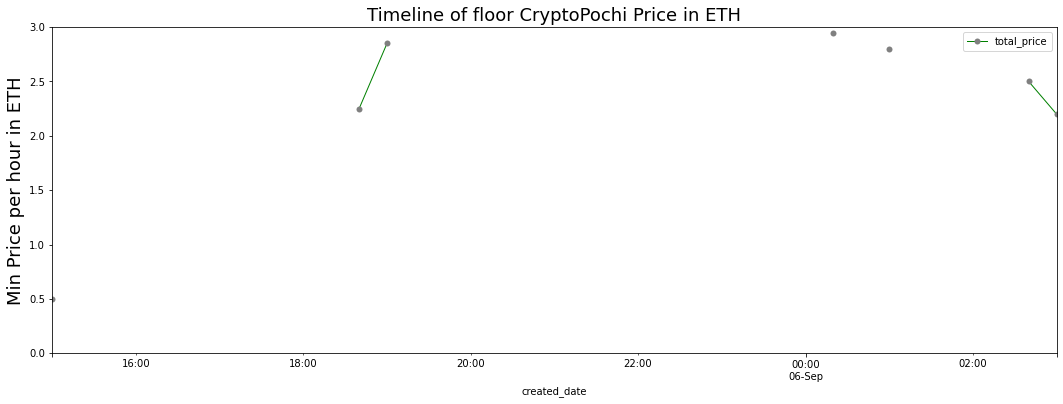

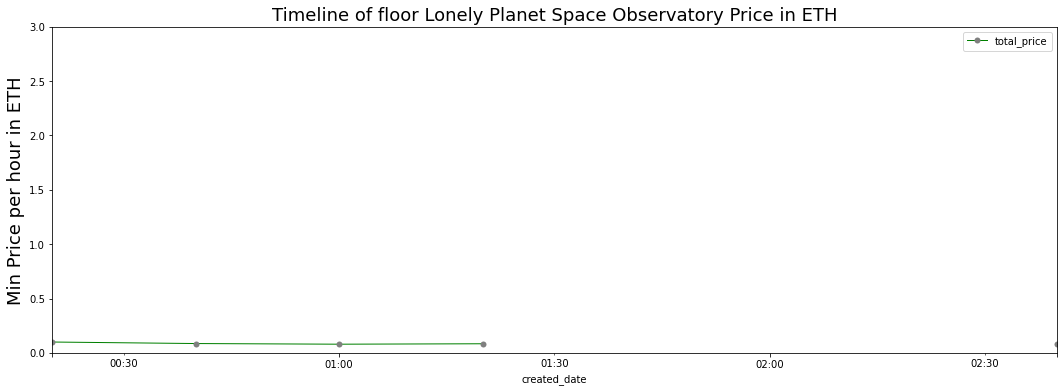

In [198]:
sales_dfs = []
fig, ax = plt.subplots(len(collections), figsize=(18,6))
# Download and Load data
for idx, collection in enumerate(collections):
    save_location = str(os.getcwd())+ "\\static\\" + collection['asset_name'] + "\\";
    
    # Download assets if you need
    download_asset_info(save_location, asset_name=collection['asset_name'], contract=collection['contract'], limit=1000, request_buffer=1)
    # Load assets
    collection['assets'] = load_assets_info(save_location, asset_name=collection['asset_name'])
    # set created date of the collection to the start date
    collection['start_date'] = (datetime.fromisoformat(collection['assets'][0]['collection']['created_date'][:10])).date()
    # set event type to download and download if needed
    event_type = 'successful'
    download_event_info(save_location+event_type+'\\', contract=collection['contract'], start_date=collection['start_date'],
                                               end_date= (collection['start_date'] + timedelta(days=14)),
                                               event_type=event_type, hour_chunks=24, request_buffer=.5)
    # load events
    collection['sales'] = load_events_info(save_location+event_type+'\\')
    
    # modify data as needed
    sales_dfs.append(pd.DataFrame.from_records(collection['sales']))
    try:
        sales_dfs[idx]['total_price'] = sales_dfs[idx]['total_price'].astype(float)*(10**-18)
    except:
        continue
    sales_dfs[idx]['created_date'] = pd.to_datetime(sales_dfs[idx]['created_date'])
    
    # set data and plot
    data = sales_dfs[idx][['created_date', 'total_price']].resample('20min', on='created_date').min()['total_price']
    data = pd.DataFrame(data)
    ax[idx] = data.plot(figsize=(18,6), color="green", linewidth=1, marker='o', markerfacecolor='grey', markeredgewidth=0)

    ax[idx].set_alpha(0.8)
    ax[idx].set_title("Timeline of floor " + collection['asset_name']+ " Price in ETH", fontsize=18)
    ax[idx].set_ylabel("Min Price per hour in ETH", fontsize=18);
    ax[idx].set_ylim(top=3)
    ax[idx].set_ylim(bottom=0)
    
plt.show()